In [1]:
import cv2
import os
data_path='test'
categories=os.listdir(data_path)
labels=[i for i in range (len(categories))]
label_dict=dict(zip(categories,labels))
print(label_dict)
print(categories)
print(labels)

{'cloudy': 0, 'sunny': 1}
['cloudy', 'sunny']
[0, 1]


In [2]:
img_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)

    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(gray,(img_size,img_size))
            data.append(resized)
            target.append(label_dict[category])

        except Exception as e:
           print('Exception: ',e)
       

In [3]:
import numpy as np

data=np.array(data)/255.0         # normalizing


data=np.reshape(data,(data.shape[0],img_size,img_size,1))
print(data.shape)

target=np.array(target)

from tensorflow.keras.utils import to_categorical
# from keras.utils import np_utils

new_target=to_categorical(target)
print(new_target)

(252, 100, 100, 1)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]


In [4]:
new_target

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [5]:
np.save('data',data)
np.save('target',new_target)

In [6]:
import numpy as np
data= np.load('data.npy')
target=np.load('target.npy')

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [8]:
model = Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# the first cnn layer followed by relu and maxpooling layers


model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# the second cnn layer followed by relu and maxpooling layers
          
          
model.add(Flatten())
model.add(Dropout(0.5))
# flatten layer to stack the output convolutions from second convolution layer

model.add(Dense(50,activation='relu'))
# dense layer of 50 neurons

model.add(Dense(2,activation='softmax'))
# the final layer with two outputs and two categories


C:\LOGS\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [13]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.keras',monitor='val_loss',verbose=1,save_best_only=True,mode='auto')

history = model.fit(train_data,train_target,epochs=5,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.6071 - loss: 0.8415
Epoch 1: val_loss improved from inf to 0.69309, saving model to model-001.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 578ms/step - accuracy: 0.6109 - loss: 0.8361 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 0.4470 - loss: 0.6950
Epoch 2: val_loss did not improve from 0.69309
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 470ms/step - accuracy: 0.4569 - loss: 0.6945 - val_accuracy: 0.5000 - val_loss: 0.6956
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - accuracy: 0.6438 - loss: 0.6644
Epoch 3: val_loss did not improve from 0.69309
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 462ms/step - accuracy: 0.6431 - loss: 0.6646 - val_accuracy: 0.5000 - val_loss: 0.7350
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - accuracy: 0.6511 - loss: 0.6332
Epoch 4: val_loss did not improve from 0.69309
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 462ms/step - accuracy: 0.6494 - loss: 0.6335 - val_accuracy: 0.5000 - val_

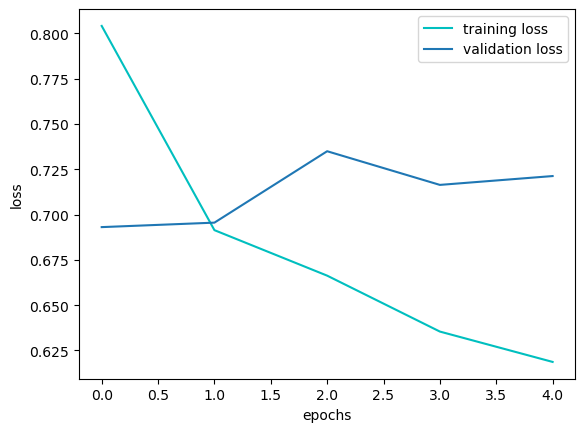

In [14]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'],'c',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

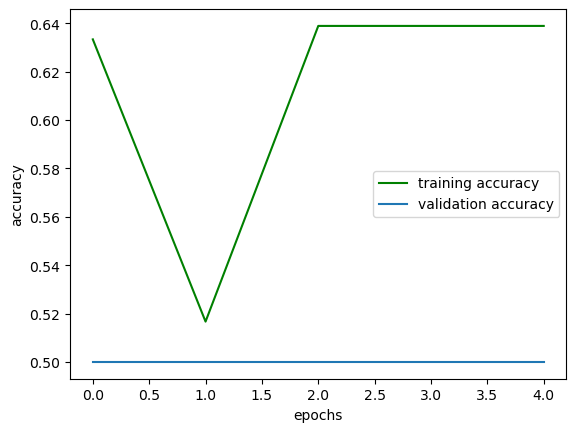

In [15]:
plt.plot(history.history['accuracy'],'g',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [16]:
model.save('weatherdetector.keras')

In [17]:
model=load_model('weatherdetector.keras')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Layer (type)             ┃ Output Shape      ┃   Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ conv2d (Conv2D)          │ (None, 98, 98,    │     2,000 │
│                          │ 200)              │           │
├──────────────────────────┼───────────────────┼───────────┤
│ activation (Activation)  │ (None, 98, 98,    │         0 │
│                          │ 200)              │           │
├──────────────────────────┼───────────────────┼───────────┤
│ max_pooling2d            │ (None, 49, 49,    │         0 │
│ (MaxPooling2D)           │ 200)              │           │
├──────────────────────────┼───────────────────┼───────────┤
│ conv2d_1 (Conv2D)        │ (None, 47, 47,    │   180,100 │
│                          │ 100)              │           │
├──────────────────────────┼───────────────────┼───────────┤
│ activation_1             │ (None, 47, 47,    │         0 │
│ (Activation)             │ 100)              │           │
├──────────────────────────┼───────────────────┼───────────┤
│ max_pooling2d_1          │ (None, 23, 23,    │         0 │
│ (MaxPooling2D)           │ 100)              │           │
├──────────────────────────┼───────────────────┼───────────┤
│ flatten (Flatten)        │ (None, 52900)     │         0 │
├──────────────────────────┼───────────────────┼───────────┤
│ dropout (Dropout)        │ (None, 52900)     │         0 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense (Dense)            │ (None, 50)        │ 2,645,050 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense_1 (Dense)          │ (None, 2)         │       102 │
└──────────────────────────┴───────────────────┴───────────┘

 Total params: 8,481,758 (32.36 MB)

 Trainable params: 2,827,252 (10.79 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,654,506 (21.57 MB)

In [18]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [19]:
import os
import cv2
from  tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow import keras

In [20]:
model=load_model('weatherdetector.keras')

In [23]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

h,w= 100,100
img= image.load_img('s047.jpg',target_size=(100,100,3))
                    
imag= cv2.imread('s047.jpg')
gray= cv2.cvtColor(np.float32(img),cv2.COLOR_BGR2GRAY)
out=np.expand_dims(gray,axis=0)
final_img=out/255.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
pred= [[0.21428373 0.7857163 ]]
max index:  1
sunny


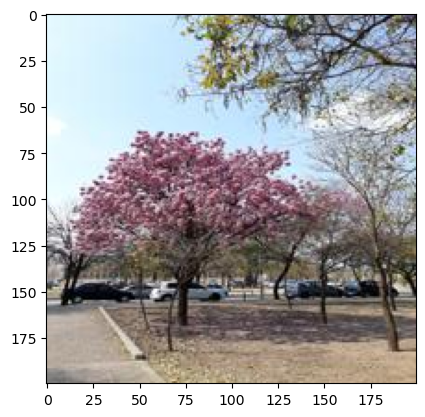

In [24]:
pred= model.predict(final_img)
print('pred=',pred)
max_index=np.argmax(pred[0])
print('max index: ',max_index)
emotions=('cloudy','sunny')
predicted_emotion=emotions[max_index]
print(predicted_emotion)
plt.imshow(cv2.cvtColor(imag,cv2.COLOR_BGR2RGB))

plt.show()